# Sprawozdanie z Laboratorium 6
## Autorzy: Mateusz Pawliczek, Piotr Świerzy  
## Data: 22.04.2025

## Zadanie 1

### (a) Numeryczne obliczenie całki metodami kwadratur złożonych i analiza błędu

Celem tego zadania było obliczenie wartości całki:

```math
\int_0^1 \frac{4}{1 + x^2} \, dx = \pi
```

przy użyciu trzech metod złożonych kwadratur: **metody prostokątów środkowych (mid-point rule)**, **metody trapezów** oraz **metody Simpsona**. Następnie przeanalizowano **bezwzględny błąd względny** względem liczby ewaluacji funkcji podcałkowej.

---

#### Teoria

Każda z użytych metod przybliża wartość całki na podstawie podziału przedziału całkowania $[0,1]$ na $n$ równych części. Dla każdej metody krok siatki wynosi $h = \frac{1}{n}$, a liczba ewaluacji funkcji to $n + 1$.

Poniżej przedstawiono wzory stosowane w każdej z metod:

- **Metoda prostokątów środkowych (mid-point rule):**

```math
\int_a^b f(x) dx \approx h \sum_{i=0}^{n-1} f\left(x_i + \frac{h}{2}\right)
```

- **Metoda trapezów:**

```math
\int_a^b f(x) dx \approx \frac{h}{2} \left[f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n)\right]
```

- **Metoda Simpsona:**

```math
\int_a^b f(x) dx \approx \frac{h}{3} \left[f(x_0) + 4f(x_1) + 2f(x_2) + \dots + f(x_n)\right]
```

## Zadanie 2
### Obliczenie całki metodą Gaussa-Legendre’a i analiza błędu numerycznego

W tym podpunkcie celem było obliczenie tej samej całki:

```math
\int_0^1 \frac{4}{1 + x^2} \, dx = \pi
```

tym razem **przy użyciu kwadratury Gaussa-Legendre’a**. Dla różnych rzędów $n$ obliczono przybliżoną wartość całki, a następnie wyznaczono **wartość bezwzględną błędu względnego** względem wartości dokładnej $\pi$:

```math
\text{error}_{\text{rel}} = \left| \frac{I_{\text{num}} - \pi}{\pi} \right|
```

---

#### Teoria

Kwadratura Gaussa-Legendre’a przybliża wartość całki:

```math
\int_{-1}^1 f(x) \, dx \approx \sum_{i=1}^{n} w_i f(x_i)
```

gdzie:
- $x_i$ to węzły (pierwiastki wielomianu Legendre’a stopnia $n$),
- $w_i$ to odpowiadające im wagi.

Aby obliczyć całkę na przedziale $[0,1]$, dokonano przekształcenia zmiennej:

```math
\int_0^1 f(x)\,dx = \int_{-1}^1 f\left(\frac{1 + t}{2}\right)\,dt
```


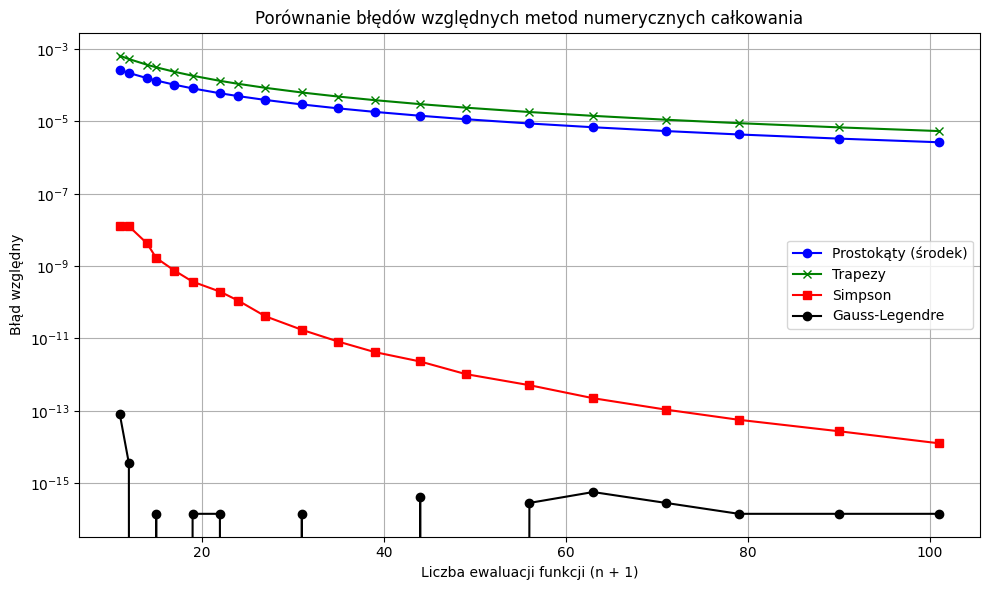

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate

def f(x):
    return 4 / (1 + x**2)

def midpoint_rectangular_formula(a, b, m):
    step = (b - a) / m
    result = 0
    for i in range(m):
        midpoint = a + (i + 0.5) * step
        result += f(midpoint)
    return result * step

def trapezoidal_formula(a, b, m):
    x = np.linspace(a, b, m)
    y = f(x)
    return scipy.integrate.trapezoid(y , x)

def simpsons_formula(a, b, m):
    # only works for odd number of points
    if m % 2 == 0:
        m += 1
    x = np.linspace(a, b, m)
    y = f(x)
    return scipy.integrate.simpson(y , x = x)

def relative_error(x):
    return abs(x - np.pi) / np.pi

h_values = np.logspace(-2, -1, 20)
n_values = np.round(1 / h_values).astype(int)

mid_errors = [relative_error(midpoint_rectangular_formula(0, 1, n)) for n in n_values]
trap_errors = [relative_error(trapezoidal_formula(0, 1, n)) for n in n_values]
simp_errors = [relative_error(simpsons_formula(0, 1, n)) for n in n_values]

# Zadanie 2

def f_trans(x):
    return f(x/2 + 1/2)

gauss_errors = []

for n in n_values:
    x, w = np.polynomial.legendre.leggauss(n)
    approx = np.sum(f_trans(x) * w) / 2
    gauss_errors.append(relative_error(approx))

plt.figure(figsize=(10, 6))
plt.plot(n_values + 1, mid_errors, label='Prostokąty (środek)', color='blue', marker='o')
plt.plot(n_values + 1, trap_errors, label='Trapezy', color='green', marker='x')
plt.plot(n_values + 1, simp_errors, label='Simpson', color='red', marker='s')
plt.plot(n_values + 1, gauss_errors, label='Gauss-Legendre', color='black',  marker='o', linestyle='-')
plt.yscale('log')
plt.xlabel('Liczba ewaluacji funkcji (n + 1)')
plt.ylabel('Błąd względny')
plt.title('Porównanie błędów względnych metod numerycznych całkowania')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Wniosek
Zarówno klasyczne metody kwadratur złożonych (prostokątów, trapezów i Simpsona), jak i kwadratura Gaussa-Legendre’a umożliwiają efektywne przybliżenie wartości całki $ \int_0^1 \frac{4}{1 + x^2} , dx = \pi $. Metody wyższych rzędów zbieżności (zwłaszcza Simpson i Gauss) osiągają znacznie lepszą dokładność przy mniejszej liczbie ewaluacji funkcji.

W przypadkach kwadratury Gaussa-Legendre’a zauważono jednak, że po przekroczeniu pewnej liczby punktów, dalsze zagęszczanie siatki nie prowadzi już do poprawy dokładności — dominuje wtedy błąd numeryczny, wynikający z ograniczeń precyzji obliczeń zmiennoprzecinkowych.

Metoda Gaussa okazała się najbardziej wydajna – już przy niewielkim $n$ osiąga błędy rzędu maszynowego, co czyni ją bardzo skuteczną w zastosowaniach wymagających wysokiej precyzji.

### Zadanie 1 (b) Analiza granicy dokładności metod

Celem tego podpunktu była analiza, **czy istnieje wartość kroku $h$, poniżej której dalsze jego zmniejszanie nie prowadzi już do zmniejszenia błędu całkowania**. W tym celu przeanalizowano zależność bezwzględnego błędu względnego od wartości $h$ (czyli zagęszczenia siatki) dla każdej z metod: prostokątów, trapezów, Simpsona oraz Gaussa.


In [3]:
mid_min = np.min(mid_errors)
trap_min = np.min(trap_errors)
simp_min = np.min(simp_errors)

print("Najmniejszy błąd met. kwadratów : ", mid_min)
print("Najmniejszy błąd met. trapezów : ", trap_min)
print("Najmniejszy błąd met. simpsona : ", simp_min)

Najmniejszy błąd met. kwadratów :  2.652582384528905e-06
Najmniejszy błąd met. trapezów :  5.412881102988134e-06
Najmniejszy błąd met. simpsona :  1.2580860740011244e-14


### (c) Porównanie empirycznego i teoretycznego rzędu zbieżności metod

Celem tego podpunktu było porównanie **empirycznego rzędu zbieżności** każdej z zastosowanych metod z ich **rzędem przewidywanym przez teorię**.

In [4]:
def empirical_order(errors, h_values):
    p_values = []
    for i in range(len(errors) - 1):
        p = np.log(errors[i] / errors[i + 1]) / np.log(h_values[i] / h_values[i + 1])
        p_values.append(p)
    return np.mean(p_values)

mid_order = empirical_order(mid_errors, h_values)
trap_order = empirical_order(trap_errors, h_values)
simp_order = empirical_order(simp_errors, h_values)

print(f"Empiryczny rząd zbieżności metody prostokątów: {mid_order:.2f}")
print(f"Empiryczny rząd zbieżności metody trapezów: {trap_order:.2f}")
print(f"Empiryczny rząd zbieżności metody Simpsona: {simp_order:.2f}")

Empiryczny rząd zbieżności metody prostokątów: 2.00
Empiryczny rząd zbieżności metody trapezów: 2.08
Empiryczny rząd zbieżności metody Simpsona: 6.00
